![](../lab%20header%20image.png)

<div style="text-align: center;">
    <h3>Experiment No. 7</h3>
</div>

<img src="../Student%20Information.png" style="width: 100%;" alt="Student Information">

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>AIM</strong>
</div>

**To perform corner detection using OpenCV.**

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>Theory/Procedure/Algorithm</strong>
</div>

Corner detection is a vital aspect of image processing and computer vision. It involves identifying points in an image where there are sharp changes in intensity, which often correspond to the corners of objects. This experiment explores various corner detection techniques using OpenCV, including Harris Corner Detection, Shi-Tomasi Corner Detection, FAST, SIFT, and ORB. The goal is to compare the effectiveness of these methods visually.

#### 1. Harris Corner Detection

Harris Corner Detection is a widely used technique based on the intensity gradient of the image. It computes a corner response function $ R $ using the formula:

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

where $ M $ is the second moment matrix computed from image gradients, and $ k $ is a sensitivity factor (typically $ 0.04 $).

#### 2 Shi-Tomasi Corner Detection

The Shi-Tomasi method, an improvement over Harris, uses the minimum eigenvalue of the second moment matrix to detect corners. A corner is detected if:

$$
\min(\lambda_1, \lambda_2) > \text{threshold}
$$

where $ \lambda_1 $ and $ \lambda_2 $ are the eigenvalues of the covariance matrix.

#### 3. FAST Corner Detection

FAST (Features from Accelerated Segment Test) is an efficient corner detection algorithm that evaluates the intensity of a pixel compared to its neighboring pixels in a circular pattern. If the number of contiguous pixels significantly brighter or darker than the center pixel exceeds a threshold, it is classified as a corner.

#### 4. SIFT Corner Detection

Scale-Invariant Feature Transform (SIFT) identifies keypoints in an image and computes descriptors that are invariant to scale and rotation. It detects corners based on difference-of-Gaussian filtering and creates robust features for object recognition.

#### 5. ORB Corner Detection

ORB (Oriented FAST and Rotated BRIEF) is a fast alternative to SIFT and SURF. It combines the FAST keypoint detector and the BRIEF descriptor while providing rotation invariance.


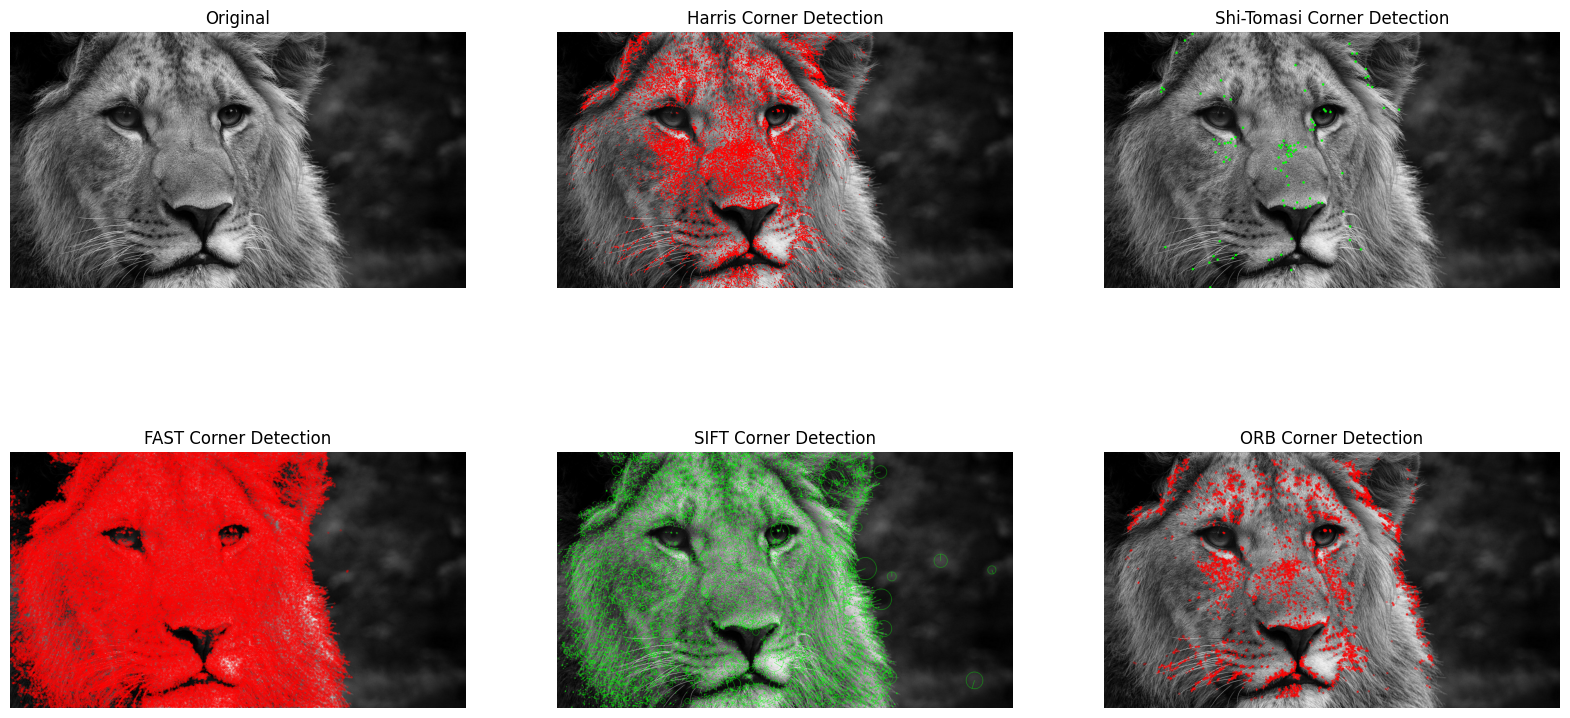

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('base.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 1. Harris Corner Detection
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
harris = cv2.dilate(harris, None)
image_harris = image.copy()
image_harris[harris > 0.01 * harris.max()] = [255, 0, 0]

# 2. Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.intp(corners)
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 5, (0, 255, 0), -1)

# 3. FAST (Features from Accelerated Segment Test) Corner Detection
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(gray, None)
image_fast = image.copy()
cv2.drawKeypoints(image, kp_fast, image_fast, color=(255, 0, 0))

# 4. SIFT (Scale-Invariant Feature Transform) Corner Detection
sift = cv2.SIFT_create()
kp_sift = sift.detect(gray, None)
image_sift = image.copy()
cv2.drawKeypoints(image, kp_sift, image_sift, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 5. ORB (Oriented FAST and Rotated BRIEF) Corner Detection
orb = cv2.ORB_create(nfeatures=10000)  # Increase the number of features
kp_orb = orb.detect(gray, None)
image_orb = image.copy()
cv2.drawKeypoints(image, kp_orb, image_orb, color=(255, 0, 0), flags=0)

# Compare all results
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(image), plt.title('Original'), plt.axis('off')
plt.subplot(232), plt.imshow(image_harris), plt.title('Harris Corner Detection'), plt.axis('off')
plt.subplot(233), plt.imshow(image_shi_tomasi), plt.title('Shi-Tomasi Corner Detection'), plt.axis('off')
plt.subplot(234), plt.imshow(image_fast), plt.title('FAST Corner Detection'), plt.axis('off')
plt.subplot(235), plt.imshow(image_sift), plt.title('SIFT Corner Detection'), plt.axis('off')
plt.subplot(236), plt.imshow(image_orb), plt.title('ORB Corner Detection'), plt.axis('off')
plt.show()

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>CONCLUSION</strong>
</div>

The experiment successfully implemented various corner detection algorithms using OpenCV, showcasing their differences in performance. Each method has its strengths: Harris and Shi-Tomasi are suitable for detecting corners in general, while FAST, SIFT, and ORB provide robust features for more complex image analysis tasks. Understanding these techniques enhances the ability to select the appropriate method for specific applications in computer vision.

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>ASSESSMENT</strong>
</div>

<img src="../marks_distribution.png" style="width: 100%;" alt="marks_distribution">